In [9]:
import sympy
import numpy as np
import matplotlib.pyplot as plt


典型的な侵徹体の質量を、その形状因子のみから計算することを目的とする。

質量は体積が明らかであれば密度を掛ければ算出できるので、ここでは特に体積の導出方法について検討する。

侵徹体の形状は様々なものがあるが、ここでは以下のように、半径$a$、長さ$L$の円柱部に半径$s$の円を侵徹体軸上で回転させた先端部を貼り付けた侵徹体を考える。この侵徹体形状は低速度侵徹を解析的に解くことが可能な形状であり、侵徹の試験において多く用いられている。

このような侵徹体の先端形状を定義する際に、CRH(Calibre-Head radius)と呼ばれる以下の指標を用いる。

$$ \psi = \frac{s}{2a}$$

この指標を用いることで、侵徹を簡潔に表すことができる。

本項の目標は、上述の特徴を有する侵徹体の体積$V$を

$$ V = \pi a^2 (L+ka)$$

のように、円柱部の断面積を用いて簡潔に表現することである。

2.0


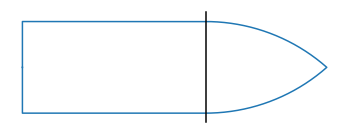

In [2]:
L = 2 # 円柱長さ
s = 2 # 侵徹体先端円弧半径
a = 0.5 # 侵徹体径
psi = s/2/a #CRH

l = a*np.sqrt(4*psi-1) # 先端部長さ(図参照)
L0 = L + l # 全長
print(psi)
theta0 =np.arcsin((2*psi-1)/psi/2)
theta = np.linspace(np.pi/2,theta0,100)
x = np.array([-L,-L,0])
y = np.array([0,a,a])
x = np.hstack([x,s*np.cos(theta)])
y = np.hstack([y, s*np.sin(theta)-(s-a)])
x = np.hstack([x,x[::-1]])
y = np.hstack([y,-y[::-1]])
fig,ax=plt.subplots()
ax.plot(x,y)
ax.plot([0,0],[a*1.2,-a*1.2],"k-")
ax.set_xticks([])
ax.set_yticks([])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
ax.set_aspect("equal")
fig.savefig("crh2.png",dpi=300)


In [3]:
L,l,a,s, psi,theta, thetaD,k = sympy.symbols("L,l,a,s,psi,theta, theta_0, k")
theta0 = sympy.asin((2*psi-1)/psi/2)

l = s*sympy.cos(theta0)
l = a*sympy.sqrt(4*psi-1)
l

a*sqrt(4*psi - 1)

侵徹体先端部の重さ(=体積)を求める。

侵徹体軸上に、$\theta_0 \rightarrow \pi/2$の範囲で存在する半径$s$の円の体積を求めるためには、

$$ y = s \sin{(theta)} - (s-a) $$
$$ x = s \cos{(theta)}$$
$$ I = \int_{\theta_0}^{\frac{\pi}{2}} \pi y^2 dx$$

を解けばいいので、以下のように解く。


In [4]:
y = 2*a*psi*sympy.sin(theta)-(2*a*psi-a)
x = s*sympy.cos(theta)
dx = sympy.diff(x,theta)
f = sympy.pi*(y*y*dx).subs([[s,2*a*psi]])
I = sympy.integrate(f,(theta,theta0, sympy.pi/2)).simplify().subs([[sympy.sqrt((4*psi-1)/psi**2), sympy.sqrt(4*psi-1)/psi]])

sympy.printing.print_python(y)
sympy.printing.print_python(x)
sympy.printing.print_python(dx)


a = Symbol('a')
psi = Symbol('psi')
theta = Symbol('theta')
e = 2*a*psi*sin(theta) - 2*a*psi + a
s = Symbol('s')
theta = Symbol('theta')
e = s*cos(theta)
s = Symbol('s')
theta = Symbol('theta')
e = -s*sin(theta)


すこし面倒だが、式を整理してきれいな形にする。

In [5]:
Is = (I/sympy.pi).expand().subs(sympy.asin((2*psi-1)/2/psi).expand(),thetaD) # thetaDは theta_0の記号の仮置き, 後の式変形をしやすいようにπで割っておく
Is

-8*a**3*psi**3*theta_0 + 4*pi*a**3*psi**3 + 4*a**3*psi**2*theta_0 - 4*a**3*psi**2*sqrt(4*psi - 1) - 2*pi*a**3*psi**2 + 4*a**3*psi*sqrt(4*psi - 1)/3 - a**3*sqrt(4*psi - 1)/3

In [6]:
Id = sympy.pi*sympy.collect(sympy.collect(sympy.collect(Is, sympy.sqrt(4*psi-1)), psi), a)
Id

pi*a**3*(psi**3*(-8*theta_0 + 4*pi) + psi**2*(4*theta_0 - 2*pi) + sqrt(4*psi - 1)*(-4*psi**2 + 4*psi/3 - 1/3))

ここで、 $\psi^3, \psi^2$で括られている項に着目すると、それぞれ、
$$-8\psi^3\left(\theta_0-\pi/2 \right), -4\psi^2\left(\theta_0-\pi/2\right)$$
となる。ところで、$\theta_0$は、$\sin$が$\frac{2\psi-1}{2\psi}$となる角度($\theta_0=\sin^{-1}{(\sin{(\theta_0)})}$)であった。今、$\sin$と$\cos$の関係から

$$ \sin{(\theta_0-\pi/2)} =  \cos{(\theta_0)} $$
$$ \cos{(\theta_0)} = \sqrt{1-\sin^2{(\theta_0)}} = \frac{\sqrt{4\psi-1}}{2\psi} $$

であること、また、
$$ \sin{(\theta_0-\pi/2)} =  \cos{(\theta_0)} $$
から
$$ \theta_0 - \pi/2 =\sin^{-1}{(\cos{(\theta_0)})}$$
であることから、
$$ \theta_0 - \pi/2 =\sin^{-1}{\frac{\sqrt{4\psi-1}}{2\psi} }$$

を得る。よって、上セルを適当に置換することで、先端部の体積を以下のように得ることが出来、当初の目標であった$k$を以下のように得ることが出来る。


In [7]:
Ia = Id.subs([[-8*thetaD+4*sympy.pi, -8*sympy.asin(sympy.sqrt(4*psi-1)/2/psi)], [4*thetaD-2*sympy.pi, 4*sympy.asin(sympy.sqrt(4*psi-1)/2/psi)]])
Ia


pi*a**3*(-8*psi**3*asin(sqrt(4*psi - 1)/(2*psi)) + 4*psi**2*asin(sqrt(4*psi - 1)/(2*psi)) + sqrt(4*psi - 1)*(-4*psi**2 + 4*psi/3 - 1/3))

In [8]:
Vo = Ia.subs(-8*psi**3*sympy.asin(sympy.sqrt(4*psi-1)/2/psi)+4*psi**2*sympy.asin(sympy.sqrt(4*psi-1)/2/psi), -4*psi**2*(2*psi-1)*sympy.asin(sympy.sqrt(4*psi-1)/2/psi))
sympy.Eq(k,Vo/sympy.pi/a**3)

Eq(k, pi*a**3*(-4*psi**2*(2*psi - 1)*asin(sqrt(4*psi - 1)/(2*psi)) + sqrt(4*psi - 1)*(-4*psi**2 + 4*psi/3 - 1/3)))

Eq(k, 8.0*a**3*(-8*psi**3*asin(sqrt(4*psi - 1)/(2*psi)) + 4*psi**2*asin(sqrt(4*psi - 1)/(2*psi)) + sqrt(4*psi - 1)*(-4*psi**2 + 4*psi/3 - 1/3)))